In [68]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

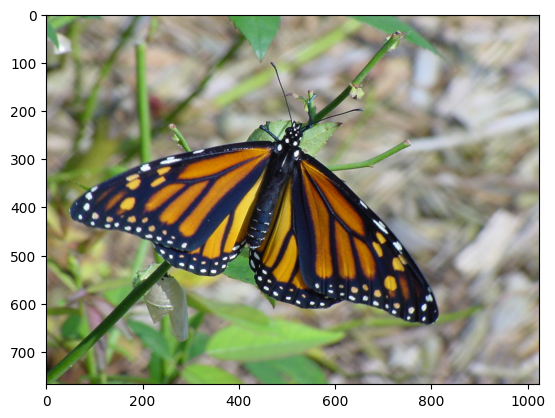

[[[139 133 133]
  [139 135 132]
  [138 137 132]
  ...
  [143 147 148]
  [142 146 145]
  [141 145 144]]

 [[133 133 131]
  [135 136 131]
  [134 140 130]
  ...
  [144 148 147]
  [143 147 146]
  [142 146 145]]

 [[128 134 130]
  [129 136 129]
  [128 140 126]
  ...
  [144 148 147]
  [143 148 144]
  [142 147 143]]

 ...

 [[ 76 129  47]
  [ 77 130  48]
  [ 80 131  52]
  ...
  [167 162 156]
  [166 161 155]
  [165 160 154]]

 [[ 78 131  49]
  [ 81 134  52]
  [ 84 135  56]
  ...
  [165 160 154]
  [164 159 153]
  [164 159 153]]

 [[ 80 133  51]
  [ 83 135  53]
  [ 87 138  59]
  ...
  [163 158 152]
  [163 158 152]
  [163 158 152]]]


In [69]:
imBRG = cv2.imread("./leedsbutterfly/images/0010001.png")
imRGB = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

print(imRGB)

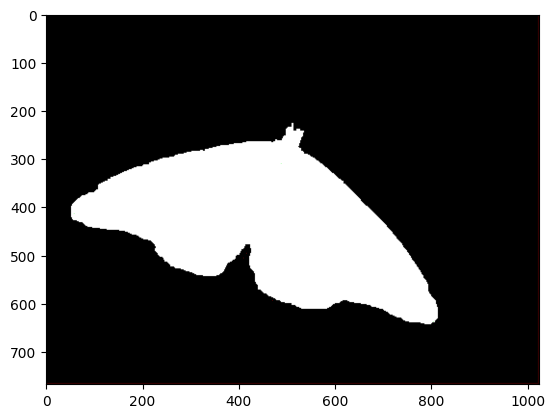

[[255   0   0]
 [  0   0   0]
 [255   0   0]
 ...
 [  0   0   0]
 [255   0   0]
 [  0   0   0]]
1024


In [70]:
seg = cv2.imread(".//leedsbutterfly/segmentations/0010001_seg0.png")
seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)
plt.imshow(seg)
plt.show()

print(seg[0])
print(len(seg[0]))

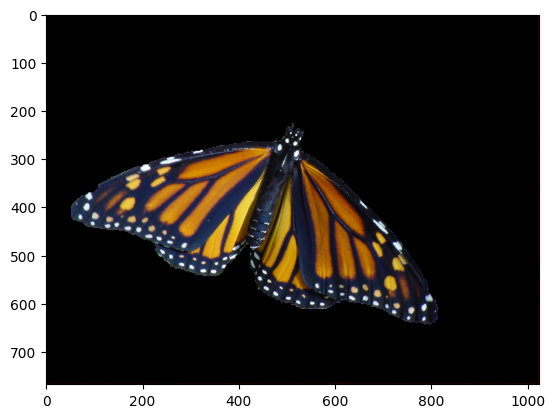

In [71]:
# Để trích xuất chỉ các pixel liên quan đến obj trong ảnh, ta có thể lấy  ảnh.*seg:

import numpy as np


def remove_zeros_numpy(array):

    return array[np.any(array != 0, axis=1)]


Obj = np.multiply(imRGB/255, seg/255)  # .* matlab

plt.imshow(Obj)
plt.show()

In [72]:
import os


def getPixelFromObj(path, folder, folder_seg):
    img_path = folder+"/"+path
    seg_path = folder_seg+"/"+path.split('.')[0] + "_seg0."+path.split('.')[1]

    imBRG = cv2.imread(img_path)
    imRGB = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)

    seg = cv2.imread(seg_path)
    seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)

    Obj = np.multiply(imRGB/255, seg/255)
    pixel_values_ehe = Obj.reshape((-1, 3))

    filtered_arr = pixel_values_ehe[~np.all(pixel_values_ehe == 0, axis=1)]
    return filtered_arr

In [73]:

def clusterImage(clusterBuilder, image_path):
    imBRG = cv2.imread(image_path)
    test = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
    test_array = test.reshape((-1, 3))

    testnew = clusterBuilder.cluster_centers_[
        clusterBuilder.predict(test_array/255)]
    testnew = np.reshape(testnew, np.shape(test))

    plt.imshow(test)
    plt.show()
    plt.imshow(testnew)
    plt.show()


def Vhistorygram(clusterBuilder, img_name, isObj=False, totalColors=16,
                 image_folder="./leedsbutterfly/images", seg_folder="./leedsbutterfly/segmentations"):
    
    imBRG = cv2.imread(image_folder + "/" + img_name)
    test = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
    test_array = test.reshape((-1, 3))
    if (isObj != False):
        test_array = getPixelFromObj(img_name, image_folder, seg_folder)
        color_ids = clusterBuilder.predict(test_array)
    else:
        color_ids = clusterBuilder.predict(test_array / 255)   
    
    histogram = np.histogram(
        color_ids, bins=totalColors, range=(0, totalColors))[0]

    V = np.histogram(color_ids, bins=totalColors, range=(
        0, totalColors))[0]/np.shape(test_array)[0]

    return V

In [74]:
# Phần này thực hiện phân cụm mầu sắc.
# Ở đây mỗi pixel (R, G, B) tương ứng với một mầu sắc.Để phân cụm mầu sắc, ta tập hợp mầu sắc của tất cả các ảnh lại.
# Nếu dùng tất cả các ảnh để tập hợp thành một vector, số lượng mầu sắc sẽ rất lớn.
# Do vậy ta chỉ cần dùng một tập nhỏ các pixel mầu sắc, lấy ngẫu nhiên từ tập ảnh dữ liệu.

# Chon ngau nhien 50 imgs từ tất cả các classs,  de tinh toan colors_centers:

import os
image_folder = "./leedsbutterfly/images"
seg_folder = "./leedsbutterfly/segmentations"

image_names = os.listdir("./leedsbutterfly/images")

# Lấy ngẫu nhiên 50 tên hình ảnh
random_image_names = np.random.choice(image_names, 30, replace=False)

all_pixels = []

# Đọc từng hình ảnh và thêm các pixel vào danh sách
for img_name in random_image_names:
    all_pixels.extend(getPixelFromObj(img_name, image_folder, seg_folder))

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pixel_values = imRGB.reshape((-1, 3))

# Chọn số lượng cụm mong muốn

k = 16

# Áp dụng K-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16)

In [76]:
# Các tâm cụm
cluster_centers = kmeans.cluster_centers_
print("Các tâm cụm:")
print(cluster_centers)

Các tâm cụm:
[[0.0515394  0.04570933 0.03238835]
 [0.84192798 0.76089205 0.5762495 ]
 [0.52247738 0.28757431 0.1326626 ]
 [0.65409418 0.48821108 0.30878768]
 [0.15029371 0.09411815 0.05554579]
 [0.9747523  0.9712474  0.92317931]
 [0.88692248 0.51087705 0.17670948]
 [0.47267807 0.39102462 0.30488544]
 [0.22886835 0.17784777 0.13913447]
 [0.77311181 0.37670198 0.10435133]
 [0.921356   0.88302965 0.73007969]
 [0.85725811 0.67893364 0.3946316 ]
 [0.83917527 0.00523549 0.00296543]
 [0.33057301 0.26546448 0.21582147]
 [0.35792028 0.11965657 0.04542875]
 [0.63470486 0.58148606 0.50852133]]


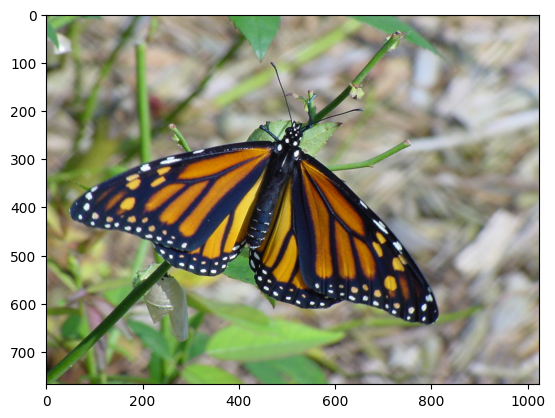

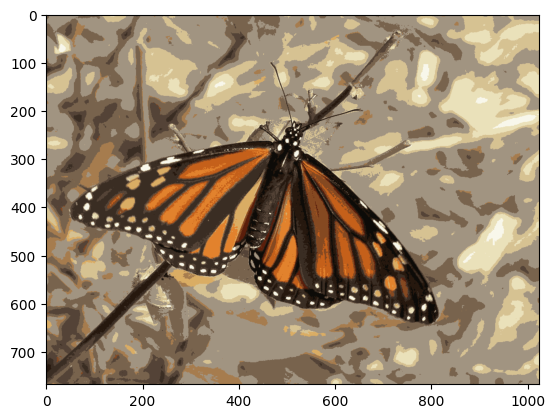

In [77]:
clusterImage(kmeans, "./leedsbutterfly/images/0010001.png" )

In [78]:
v = Vhistorygram(kmeans, img_name="0010001.png", isObj=True)
print(v)

[0.08827209 0.00603171 0.08647939 0.01682529 0.15395485 0.01687509
 0.07618378 0.02036713 0.27613896 0.09285345 0.00700276 0.02491737
 0.00557108 0.08205987 0.03194502 0.01452216]


In [100]:
image_folder = "./leedsbutterfly/images"
seg_folder = "./leedsbutterfly/segmentations"


inputs = []
outputs = []

image_names = os.listdir("./leedsbutterfly/images")
# Đọc từng hình ảnh và thêm các pixel vào danh sách
for img_name in image_names:
  file_name_without_extension, file_extension = os.path.splitext(img_name)
  print(file_name_without_extension[:3])
  first_three_digits = int(file_name_without_extension[:3])
  v = Vhistorygram(kmeans, img_name=img_name, isObj=True)
  inputs.append(v)
  outputs.append(first_three_digits)
    

001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
003
004
004
004
004
004
004
004
004
004
004
004
004
004
004


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier

my_classification = RandomForestClassifier(n_estimators=100, random_state=42)

my_classification.fit(X_train, y_train)

score = my_classification.score(X_test, y_test)

# In kết quả
print("Accuracy trên tập test:", score)

Accuracy trên tập test: 0.8323353293413174


In [106]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
svc.fit(X_train, y_train)
svcScore = svc.score(X_test, y_test)
print("Accuracy trên tập test:", svcScore)

Accuracy trên tập test: 0.7065868263473054
